In [1163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [1164]:
df = pd.read_csv('rawdata.csv')

In [1165]:
df.head()

,Team,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Team.1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Rk,Date,Tm,NaN,Opp,Result,MP,FG,FGA,FG%,...,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,PTS
1,1,2018-10-16,BOS,NaN,PHI,W 105-87,240,42,97,0.433,...,29,61,0.475,5,26,0.192,14,23,0.609,87
2,2,2018-10-16,PHI,@,BOS,L 87-105,240,34,87,0.391,...,31,60,0.517,11,37,0.297,10,14,0.714,105
3,3,2018-10-16,GSW,NaN,OKC,W 108-100,240,42,95,0.442,...,23,54,0.426,10,37,0.27,24,37,0.649,100
4,4,2018-10-16,OKC,@,GSW,L 100-108,240,33,91,0.363,...,35,69,0.507,7,26,0.269,17,18,0.944,108


In [1166]:
#Rename Columns & Droplist
columnz = ['Rank','Date','Home_Team','@','Away_Team','Result','Minutes_Played','Field_Goal','Field_Goal_Attempts','Field_Goal_%','2Point','2Point_Attempts','2Point_%','3Point','3Point_Attempts','3Point_%','Free_Throw','Free_Throw_Attempt','Free_Throw_%','Points','Away_Field_Goal','Away_Field_Goal_Attempts','Away_Field_Goal_%','Away_2Point','Away_2Point_Attempts','Away_2Point_%','Away_3Point','Away_3Point_Attempts','Away_3Point_%','Away_Free_Throw','Away_Free_Throw_Attempt','Away_Free_Throw_%','Away_Points']
df.columns = columnz
droplist = ['Minutes_Played','Result','@']

In [1167]:
#removed nulls and noises
df = df.iloc[: , 1:]
df = df.drop(0)
df = df.drop(df[df['@'] == '@'].index)
df = df.drop(droplist, axis =1)
df = df.dropna()

In [1181]:
df = df.astype({'Free_Throw':'int','Points':'int','Free_Throw_%':'float','Away_Free_Throw_%':'float'})

In [1169]:
#homestat & away stat for data cleaning
homestatlist = ['Field_Goal','Field_Goal_Attempts','Field_Goal_%','2Point','2Point_Attempts','2Point_%','3Point','3Point_Attempts','3Point_%','Free_Throw','Free_Throw_Attempt','Free_Throw_%','Points']
awaystatlist = ['Away_Field_Goal','Away_Field_Goal_Attempts','Away_Field_Goal_%','Away_2Point','Away_2Point_Attempts','Away_2Point_%','Away_3Point','Away_3Point_Attempts','Away_3Point_%','Away_Free_Throw','Away_Free_Throw_Attempt','Away_Free_Throw_%','Away_Points']

In [1170]:
#Function to return team stat
def byTeam(string):
    x = df.loc[df['Home_Team']==string]
    x = x.drop(awaystatlist,axis=1)
    y = df.loc[df['Away_Team']==string]
    y = y.drop(homestatlist,axis=1)
    return pd.concat([x,y])

In [1187]:
#Importance of HomeCourt FreeThrow Percentage in HomeCourt - Home Court Advantage
def ftpercent(x):
    FT_Percent = round(x['Free_Throw_%']*100,2).dropna().mean()
    return FT_Percent

In [1183]:
newdf = pd.DataFrame()
newdf['Team'] = df['Home_Team']
newdf = newdf.drop_duplicates().reset_index(drop=True)

In [ ]:
for x in newdf['Team']:
    print(np.array(ftpercent(byTeam(x))))

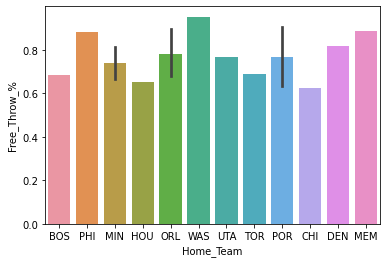

In [1203]:
#HomeFreeThrow
ax = sns.barplot(x=df["Home_Team"].sample(16), y=df["Free_Throw_%"])

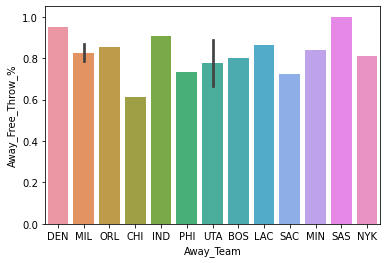

In [1202]:
#AwayFreeThrow
ax = sns.barplot(x=df["Away_Team"].sample(16), y=df["Away_Free_Throw_%"])

In [ ]:
#Looking at Free Throw in home court advantage, Free Throw points / Total Points
FTP_TP = round((df['Free_Throw']/df['Points']*100),2)

In [ ]:
df.head()

,Date,Home_Team,Away_Team,Field_Goal,Field_Goal_Attempts,Field_Goal_%,2Point,2Point_Attempts,2Point_%,3Point,...,Away_2Point,Away_2Point_Attempts,Away_2Point_%,Away_3Point,Away_3Point_Attempts,Away_3Point_%,Away_Free_Throw,Away_Free_Throw_Attempt,Away_Free_Throw_%,Away_Points
1,2018-10-16,BOS,PHI,42,97,0.433,31,60,0.517,11,...,29,61,0.475,5,26,0.192,14,23,0.609,87
3,2018-10-16,GSW,OKC,42,95,0.442,35,69,0.507,7,...,23,54,0.426,10,37,0.27,24,37,0.649,100
5,2018-10-17,CHO,MIL,41,92,0.446,25,54,0.463,16,...,28,51,0.549,14,34,0.412,15,20,0.750,113
8,2018-10-17,DET,BRK,39,92,0.424,33,68,0.485,6,...,35,55,0.636,5,27,0.185,15,22,0.682,100
9,2018-10-17,HOU,NOP,39,92,0.424,23,44,0.523,16,...,42,73,0.575,10,25,0.4,17,22,0.773,131
